Researchers have confronted complexity by dividing a complex system into smaller parts - constituents - and then taking a closer look at the parts and making sense out of them.
# Locate Isolates
The smallest distinct element of any network is an isolate: a node that is not connected to any other node (it can connect to itself).
As a network analyst, you want to identify isolates and research the reasons for their isolation. Have you overlooked an edge while constructing the network? Have you replaced negative ties with zero-weight positive ties and later discarded them, etc.? If the reasons seem to be valid, there is no need to keep the isolates. Locate the isolates with nx.isolates(G), and chop them off.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import community

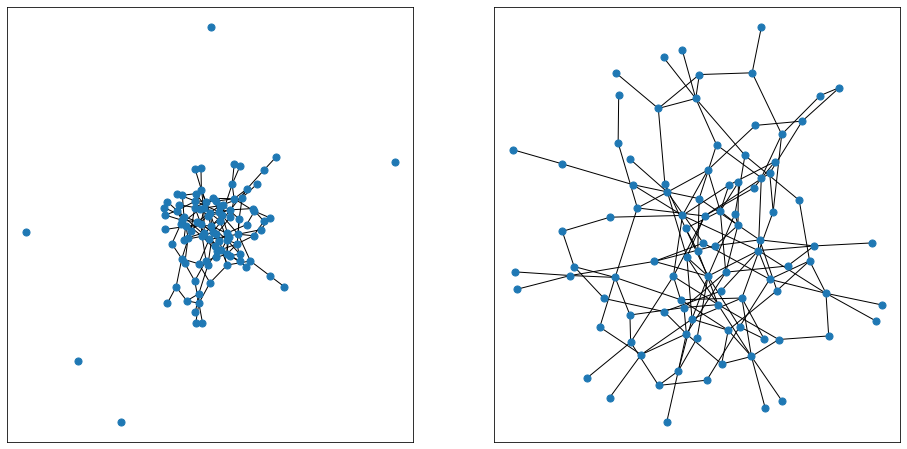

In [2]:
fig = plt.figure(figsize = (16,8))
ax0 = plt.subplot(121)
ax1 = plt.subplot(122)

G = nx.erdos_renyi_graph(100, 0.025)
pos1 = nx.spring_layout(G)
nx.draw_networkx(G, ax = ax0, pos = pos1, with_labels = False, node_size = 50)

G_isolates = nx.isolates(G)
F = G.copy()
F.remove_nodes_from(G_isolates)
nx.draw_networkx(F, ax = ax1, with_labels = False, node_size = 50)

# Split Networks into Connected Components
A connected component is a subset of network nodes such that there exists a path from each node in the subset to any other node in the same subset. (notice the word "path" here instead of "ties" or "direct links")

If a network is directed, it may have weakly and strongly connectd components. 
- In a **strongly connected** component, there is always a directed path from any node of the component to any other node of the same component. That is, a path exists from the first vertex in the pair to the second, and another path exists from the second vertex to the first. 
- In a **weakly connected** component, you are allowed to travel one-way streets in the wrong direction, if this is what is takes to get from the source to the destination.

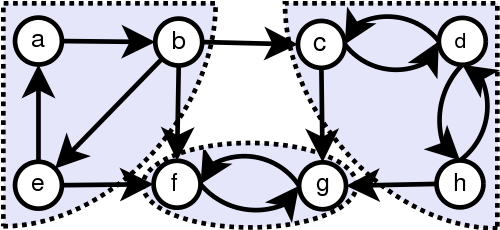
In this drawing, (a,b,e), (f,g), and (c,d,h) are strongly connected subgraphs, as there is always a directed path from any node and any other node in a subgraph. And all nodes belong to a weakly connected subgraph, as there is always a undirected path from any node and any other node in a subgraph.

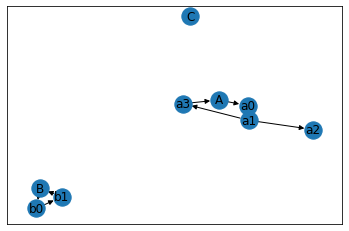

In [3]:
# construct a toy graph to play with
F = nx.DiGraph()
F.add_node('C')
F.add_edges_from([("B", "b0"), ("b0", "b1"), ("b1", "B")])
F.add_edges_from([("A", "a0"), ("a0", "a1"), ("a1", "a2"), ("a1", "a3"),("a3", "A")])
nx.draw_networkx(F, with_labels = True)

In [4]:
a = list(nx.weakly_connected_components(F))
b = list(nx.strongly_connected_components(F))
c = list(nx.connected_components(nx.Graph(F)))
print(a)
print(b)
print(c)


[{'C'}, {'b1', 'B', 'b0'}, {'a1', 'A', 'a0', 'a3', 'a2'}]
[{'C'}, {'b1', 'B', 'b0'}, {'a2'}, {'a1', 'a3', 'A', 'a0'}]
[{'C'}, {'b1', 'B', 'b0'}, {'a1', 'A', 'a0', 'a3', 'a2'}]


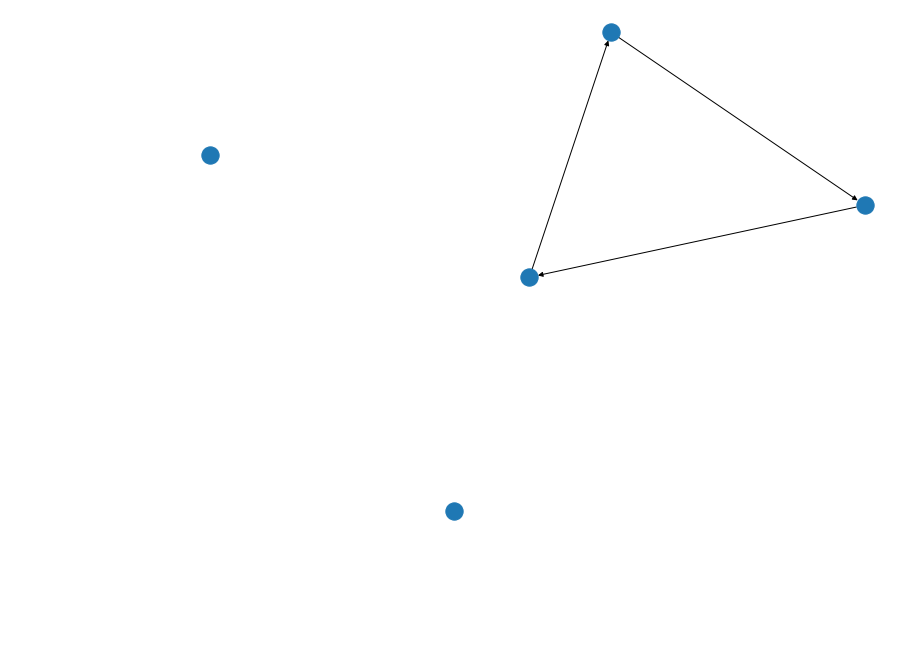

In [5]:
# Alternatively, other family of functions can be used:
fig = plt.figure(figsize = (16,12))
ax0 = plt.subplot(221)
ax1 = plt.subplot(222)
ax2 = plt.subplot(212)

E0 = nx.subgraph(F,list(nx.strongly_connected_components(F))[0])
nx.draw(E0, ax = ax0)
E1 = nx.subgraph(F,list(nx.strongly_connected_components(F))[1])
nx.draw(E1, ax = ax1)
E2 = nx.subgraph(F,list(nx.strongly_connected_components(F))[2])
nx.draw(E2, ax = ax2)

In [6]:
#  a way to sort the components by its size
d = nx.strongly_connected_components(F)
sorted(d, key = len, reverse = True)

[{'A', 'a0', 'a1', 'a3'}, {'B', 'b0', 'b1'}, {'C'}, {'a2'}]

# Separate Cores, Shells, Coronas and Crusts
The property of connectedness in components is global and, while important for social and communication networks (where paths are responsible for information diffusion), may not be adequate for semantic, product, and other types of networks, where direct and short-haul connections. Consider a network “emerald” is a synonym of “green,” and “green” is a synonym of “ecological,” but "ecological” is hardly a synonym of “emerald.”
One of the fundamental tools in modern sociology is core-peripheral analysis. A social network consists of 2 sets of nodes: the core (nodes that are more or less tightly interconnected) and the periphery (the nodes that are tightly connected to the cores, but only weakly connected to the other peripheral nodes).

**Core**: a k-core (where k could be any non-negative integer number) is a subgraph of the original network graph such that each node in the subgraph has at least k neightbor. A 0-core is the whole graph. A 1-core is a graph with no isolates. A 2-core is a graph where no node has fewer than 2 neighbors (no node is a part of a pendulum). Any graph usually has more than 1 core; the core with the largest possible k is called the main core. 

A k-core construction process is iterative:
1. start with the original graph and remove all nodes that have a degree fewer than k and all incident edges. This will probably result in some of the remaining nodes losing their neighbors and their degree decreasing.
2. some nodes that originallly have k neighbors have fewer than k neighbors after trimming. Remove them, too.
3. The remaining nodes form the k-core

**k-crust**: a k-crust is what is left of the original network when we remove the k-core. In other words, the crust is the periphery.

**k-corona**: a core has its internal structure. The subgraph of the k-core in which all nodes have exactly k neighbors in the core is called a k-corona. Unlike crusts, coronas are not necessarily connected and many consist of unconnected components-that is, unconnected within the corona.

**k-shell**: a subset of nodes in k-core but not in (k+1)-core, is called a k-shell. A shell may consist of components that are not connected within the shell.

NodeView(('Charlie', 'Delta', 'Echo', 'Foxtrot', 'Golf', 'Hotel'))

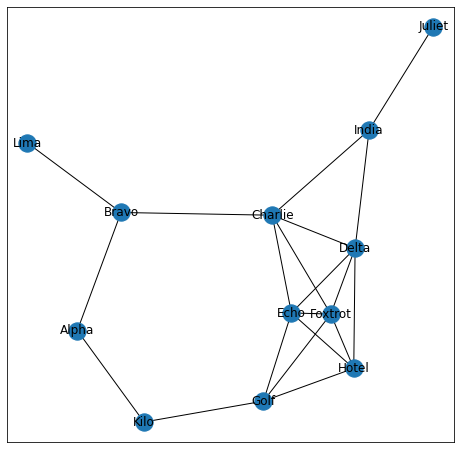

In [7]:
G = nx.Graph(
(("Alpha", "Bravo"), ("Bravo", "Charlie"), ("Charlie", "Delta"),
("Charlie", "Echo"), ("Charlie", "Foxtrot"), ("Delta", "Echo"),
("Delta", "Foxtrot"), ("Echo", "Foxtrot"), ("Echo", "Golf"),
("Echo", "Hotel"), ("Foxtrot", "Golf"), ("Foxtrot", "Hotel"),
("Delta", "Hotel"), ("Golf", "Hotel"), ("Delta", "India"),
("Charlie", "India"), ("India", "Juliet"), ("Golf", "Kilo"),
("Alpha", "Kilo"), ("Bravo", "Lima")))
fig = plt.figure(figsize = (8,8))
nx.draw_networkx(G)
nx.k_core(G).nodes()

In [8]:
print(nx.k_core(G,3).nodes())
# if k is not specified, this function returns the largest possible k-core. In this case the largest k would be 3.
print(nx.k_crust(G).nodes())
# 3-crust is nodes in the original graph but not in 3-core subgraph.
print(nx.k_corona(G, 3).nodes())
# in the original graph, Charlie has 4 neighbors. But Bravo is not in 3-core subgraph, which makes the number of Charlie's neighbors 
# in subgraph equal 3. Thus, Charlie is member of 3 corona.
print(nx.k_shell(G).nodes())
# nodes that are in 3-core but not in 4-core

['Charlie', 'Delta', 'Echo', 'Foxtrot', 'Golf', 'Hotel']
['Alpha', 'Bravo', 'India', 'Juliet', 'Kilo', 'Lima']
['Golf', 'Charlie']
['Charlie', 'Delta', 'Echo', 'Foxtrot', 'Golf', 'Hotel']


# Extract Cliques
The Giant Complex Network (GCC) and the k-cores are usually too large to be considered a single structural element. You should zoom in even further in a search for smaller network building blocks, such as cliques. 

- A **clique**, or a k-clique is a subset of k nodes such that each node is directly connnected to each other node in the clique. (We distinguish weak and strong cliques in directed graphs.) Cliques are also known as complete subgraphs. 
Any single node is a 1-clique, a monad. Any 2 connected nodes form a 2-clique, a dyad. A triangle of nodes - the result of transitive closure - is a 3-clique, a triad. Monads, dyads, and triads are very common in complex networks.

- A **maximal clique** is a k-clique that cannot be made a (k+1)-clique by adding another node to it. The largest maximal clique in a network graph is called the maximum clique. 

You have at least a theoretical and an empirical reason to search for a network for k-cliques: 
- in the theroretical case you may already have some prior knowledge about the network structure. Recognizing k-cliques in a product network almost instantly leads you to the discovery of project baskets. Closely cooperating teams in social and organizational networks are k-cliques, and such are collections of complete synonyms in semantics networks.
- in the empirical case, you use cliques as opaque network atoms. You can replace all k nodes with one node that represents the entire clique, or with a newly minted "clique-node", potentiallyl significantly simplifying the network topology.

Networkx provides function *nx.find_cliques()* for finding all maximal cliques in a graph. The function returns a list generator. The use of generator is a dire necessity. In fact, larger cliques, especially maximal and maximum cliques are rare and hard to find, which can a computationallly very hard problem (known as an NP-complete problem). Unfortunately, <mark>function *nx.find_cliques()* generates cliques in a random order.<mark>

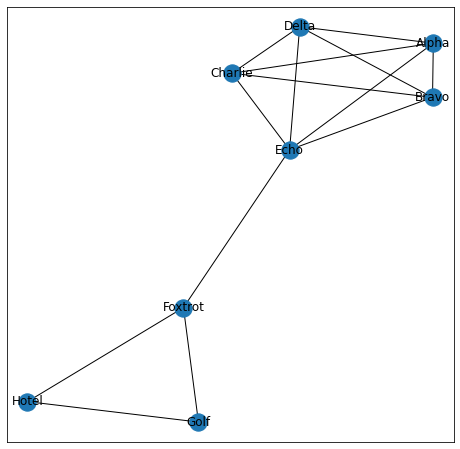

In [9]:
# Construct a toy graph to play with
fig, ax = plt.subplots(figsize = (8,8))
C = nx.complete_graph(5, nx.Graph())
nx.relabel_nodes(C, dict(enumerate(("Alpha", "Bravo", "Charlie", "Delta", "Echo"))),copy = False)
C.add_edges_from([("Echo", "Foxtrot"), ("Foxtrot", "Golf"), ("Foxtrot", "Hotel"),("Golf", "Hotel")])
nx.draw_networkx(C, ax = ax, with_labels = True)

In [10]:
# Find cliques
list(nx.find_cliques(C))

[['Hotel', 'Golf', 'Foxtrot'],
 ['Echo', 'Alpha', 'Delta', 'Bravo', 'Charlie'],
 ['Echo', 'Foxtrot']]

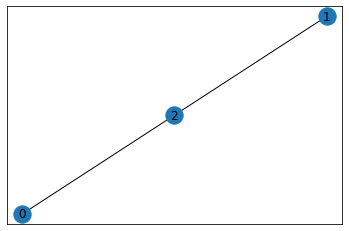

In [11]:
# Generate a new graph by replacing wach maximal clique with a new synthetic node
# be aware the function nx.make_max_clique_graph first finds all maximal cliques, with all NP-completeness implications
syn = nx.make_max_clique_graph(nx.Graph(C))
nx.draw_networkx(syn, with_labels = True)

# Recognize Clique Communities
By definition, a clique is a very rigid and sensitive network structure. Removing an edge from a k-clique transforms it into two interwound, partially overlapping, adjacent (k-1)-clique.

Intuitively, you may feel that all k nodes belong together despite of one missing edge. And the missing edge could be the victim of data entry error or improper slicing or conversion from a directed graph. Nonetheless, nx.find_cliques() will not recognize your k nodes as a clique. Instead, it will report 2 smaller cliques, leaving it up to you to notice that they actually share k-1 nodes and their separation may have been caused by a missing edge.

In that case, NetworkX supports **k-clique communities**. <mark>A **k-clique communities** is a union of all k-cliques that can be reached through adjacent k-cliques.</mark> The process of reaching all cliques in the union is called <mark>**clique percolation**</mark>

K-clique communities in complex networks are a curse and a blessing:
1. **Blessing**: they provide a flexible substitute for inflexible proper cliques. True, the nodes in a community are not in general directly interconnected; however, if the relationship represented by the edges is actually transitive, and the missing edges result from network construction imperfectioin, then the length of the path between any 2 nodes in a clique community does not really matter.
2. **Curse**: clique communities do not necessarily partition the network and can overlap with other clique communities. In other words, the same node may belong to more than clique or clique community. What's worse, if the relationship represented by the edges is only approximately transient (if A is adjacent to B, and B is adjacent to C, then A is not necessarily adjacent to C—as it would be in the case of personal friendship), then 2 nodes separated by a multi-edge path may actually have little or nothing shared.

Only you can determine whether clique communities are appropriate for your network. 

In [12]:
# find the k-clique communities
list(nx.algorithms.community.k_clique_communities(C, k=3))

[frozenset({'Foxtrot', 'Golf', 'Hotel'}),
 frozenset({'Alpha', 'Bravo', 'Charlie', 'Delta', 'Echo'})]

# Outline Modularity-Based Communities
The fuzziest and most flexible form of node organization in a complex network is network communities based on modularity. They are also called clusters or groups, and are not to be confused with clique communities.

Let's start with modularity, and assume that the network has been partitioned into non-overlapping communities. <mark>Modularity *m* is the fraction of the edges that fall within the given communities minus the expected fraction if edges were distributed at random, while conserving the node degrees. The value of *m* is in the range from -0.5(inclusive) and 1(exclusive).</mark>

Ideally, you want to partition a network in such a way that the modularity is as high as possible. <mark>The modularity of 0.6 and above corresponds to networks that have a clearly visible community structure.</mark> Unfortunately, getting the largest community is hard at least for 3 reasons:
1. The problem of optimal partitioning is NP-complete with respect to the network size. To find the best partition, you should calculate modularity for every possible partition and then select the best one. The number of partitions is simply too large, and the problem does not have a feasible exact solution for any non-trivial graph;
2. Approximate solutions do a pretty good job, but some of them are probabilistic, which means every time you run them, you may end up having slightly different partitions.
3. The resolution of modularity-based methods scales poorly, and they overlook small communities in large networks. A plausible solution is to partition the network recursively into smaller and smaller communities.

Anaconda, the most popular Python distribution, does not currently include tools for modularity-based community detection. Fortunately, the tool exists and can be easily installed via pip. It is called ***python-louvain***. The externally visible name of the module is ***community***, and you import it under this name.

In [13]:
# discover the community via python-louvain, or community module
part = community.best_partition(C)
print(part)
print(community.modularity(part, C))

{'Alpha': 0, 'Bravo': 0, 'Charlie': 0, 'Delta': 0, 'Echo': 0, 'Foxtrot': 1, 'Golf': 1, 'Hotel': 1}
0.3035714285714286


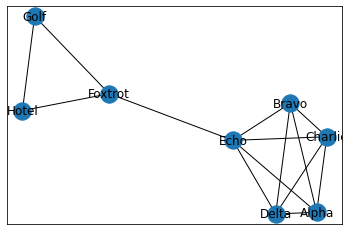

In [16]:
nx.draw_networkx(C)

[0, 1]
[(0, 0, {'weight': 10}), (0, 1, {'weight': 1}), (1, 1, {'weight': 3})]


'\nnote that the induced graph is weighted and has loops. The weight of an induced edge incident to the synthetic community nodes is \nthe number of edges in the original network that are incident to the nodes in respective communities.\n'

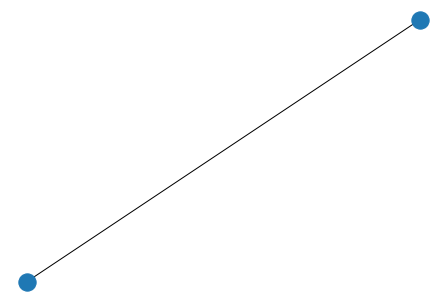

In [14]:
# replace the smaller structural elements of a large network with synthetic nodes and build an induced graph 
# just as with cliques and clique communities
induced = community.induced_graph(part, C)
print(induced.nodes())
print(induced.edges(data = True))
nx.draw(induced)
'''
note that the induced graph is weighted and has loops. The weight of an induced edge incident to the synthetic community nodes is 
the number of edges in the original network that are incident to the nodes in respective communities.
'''

In [15]:
part_as_series = pd.Series(part)
print(part_as_series.sort_values())
print(part_as_series.value_counts())

Alpha      0
Bravo      0
Charlie    0
Delta      0
Echo       0
Foxtrot    1
Golf       1
Hotel      1
dtype: int64
0    5
1    3
dtype: int64


# Perform Blockmodeling
The construction of the graph of maximal cliques or communities is a special case of blockmodeling - grouping network nodes according to some meaningful definition of equivalence and replacing them with synthetic "supernodes". A more general function ***nx.blockmodel(G,part)*** takes a graph G and its partition part as a list of node collections, and creates an induced graph. 

Unlike ***nx.make_max_clique_graph()*** and ***community.induced_graph()***, ***nx.blockmodel()*** requires the partition includes every node in the original graph exactly once. You can manually remove the offending overlapping clique from a clique partition, if you want.

# Name Extracted Blocks
From the data scientific point of view, network analysis at the macroscopic level (extraction of communities, cliques, and other structural blocks) is an example of unsupervised machine learning. The goal of unsupervised machine learning is to infer a network’s hidden structure in the absence of “labels”: node and edge attributes (except, perhaps, the edge weights).

The unearthed blocks suffer from two major interrelated problems:
- It is not clear what they mean.
- They are nameless.

In fact, if you knew the purpose or nature of a block, you would give it a name, and if you knew the name, you would guess what its purpose or nature is.